In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="EwztU04tNkHQwiBBSShs")
project = rf.workspace("new-workspace-0sgfu").project("lfw_face")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to lfw_face-1 in yolov8:: 100%|██████████| 26471/26471 [00:02<00:00, 9708.81it/s] 


In [4]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)



Mounted at /content/drive


In [5]:
# Complete code in a Jupyter Notebook cell
import os
import cv2
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image

In [6]:
# Installing ultralytics
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.6/779.6 kB 9.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [7]:
!pip install torch torchvision torchaudio torchtext


In [10]:
# Starting with a comment in config file
# defining newline variable for config file
newline='\n'
ln_1='# Train/val paths'+newline

# train, val path declaration
imgtrainpath = '/content/lfw_face-1/train/images'
imgvalpath = '/content/lfw_face-1/valid/images'
ln_2='train: ' +"'"+imgtrainpath+"'"+newline
ln_3='val: ' +"'" + imgvalpath+"'"+newline
ln_4=newline

# Optional additional paths
imgtrainlabelspath = '/content/lfw_face-1/train/labels'
imgvallabelspath = '/content/lfw_face-1/valid/labels'
ln_5='train_labels: ' +"'"+imgtrainlabelspath+"'"+newline
ln_6='val_labels: ' +"'"+imgvallabelspath+"'"+newline
ln_7=newline

# Classes
ln_8='# Classes'+newline
ln_9='names:'+newline
ln_10='  - face'+newline
ln_11='nc: 1'

config_lines=[ln_1, ln_2, ln_3, ln_4, ln_5, ln_6, ln_7, ln_8, ln_9, ln_10, ln_11]
# Creating path for config file
import os
curr_path = os.getcwd()
config_path=os.path.join(curr_path, 'config.yaml')
config_path

# Writing config file
with open(config_path, 'w') as f:
    f.writelines(config_lines)


In [11]:
# Creating path for config file
config_path=os.path.join(curr_path, 'config.yaml')
config_path

'/content/config.yaml'

In [12]:
!yolo detect train data='/content/lfw_face-1/data.yaml' model=yolov8n.pt epochs=15 imgsz=640 device=0


100% 6.23M/6.23M [00:00<00:00, 185MB/s]
Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/lfw_face-1/data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False,

In [13]:
# Copy the trained model to Google Drive
import shutil
shutil.copy2("/content/lfw_face-1/data.yaml", '/content/drive/MyDrive/GP_YOLOV7Model')

'/content/drive/MyDrive/GP_YOLOV7Model/data.yaml'

In [14]:
# Copy the trained model to Google Drive
import shutil
shutil.copy2("/content/runs/detect/train/weights/best.pt", '/content/drive/MyDrive/GP_YOLOV7Model')

'/content/drive/MyDrive/GP_YOLOV7Model/best.pt'

In [15]:
# Copy the trained model to Google Drive
import shutil
shutil.copy2("/content/runs/detect/train/weights/last.pt", '/content/drive/MyDrive/GP_YOLOV7Model')

'/content/drive/MyDrive/GP_YOLOV7Model/last.pt'

In [17]:
from ultralytics import YOLO
model = YOLO('/content/drive/MyDrive/GP_YOLOV8Model/best.pt')

In [19]:
!yolo detect train data='/content/drive/MyDrive/fnew/newfs.yaml' model=yolov8n.pt epochs=25 imgsz=640 device=0


Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/fnew/newfs.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

In [23]:
import os
import shutil

# Create a temporary directory to hold all validation images
temp_dir = '/content/drive/MyDrive/GP_YOLOV8Model/Val_Temp'
os.makedirs(temp_dir, exist_ok=True)

# List of all subdirectories containing images
subdirs = [
    'Natasha_Romanoff (Scarlett Johansson)',
    'bruce_banner (Mark Ruffalo)',
    'clint_barton (Jeremy Renner)',
    'steve_rogers (Chris Evans)',
    'thor (Chris Hemsworth)',
    'tony_stark (Robert Downey Jr.)'
]

# Base path of the validation directory
val_base_path = '/content/drive/MyDrive/fnew/newws/val'

# Copy all images from each subdirectory to the temporary directory


for subdir in subdirs:
    image_dir = os.path.join(val_base_path, subdir, 'images')
    for filename in os.listdir(image_dir):
        file_path = os.path.join(image_dir, filename)
        if os.path.isfile(file_path):
            shutil.copy(file_path, temp_dir)

# Now run the YOLO prediction command on the temporary directory
!yolo detect predict model='/content/drive/MyDrive/GP_YOLOV8Model/runs/detect/train2/weights/best.pt' conf=0.25 source=/content/drive/MyDrive/GP_YOLOV8Model/Val_Temp


Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs

image 1/161 /content/drive/MyDrive/GP_YOLOV8Model/Val_Temp/Natasha_Romanoff101.png: 640x640 2 Natasha_Romanoff (Scarlett Johansson)s, 10.3ms
image 2/161 /content/drive/MyDrive/GP_YOLOV8Model/Val_Temp/Natasha_Romanoff109.png: 640x640 2 Natasha_Romanoff (Scarlett Johansson)s, 12.0ms
image 3/161 /content/drive/MyDrive/GP_YOLOV8Model/Val_Temp/Natasha_Romanoff113.png: 640x640 1 Natasha_Romanoff (Scarlett Johansson), 9.5ms
image 4/161 /content/drive/MyDrive/GP_YOLOV8Model/Val_Temp/Natasha_Romanoff119.png: 640x640 1 Natasha_Romanoff (Scarlett Johansson), 27.0ms
image 5/161 /content/drive/MyDrive/GP_YOLOV8Model/Val_Temp/Natasha_Romanoff15.png: 640x640 2 Natasha_Romanoff (Scarlett Johansson)s, 9.5ms
image 6/161 /content/drive/MyDrive/GP_YOLOV8Model/Val_Temp/Natasha_Romanoff26.png: 640x640 1 Natasha_Romanoff (Scarlett Johansson), 7

In [22]:
!yolo detect train data='/content/drive/MyDrive/fnew/newfs.yaml' model=yolov8n.pt epochs=35 imgsz=640 device=0


Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/fnew/newfs.yaml, epochs=35, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

In [24]:
from ultralytics import YOLO
Dmodel = YOLO('/content/drive/MyDrive/GP_YOLOV8Model/runs/detect/train/weights/best.pt')

In [25]:
from ultralytics import YOLO
Rmodel = YOLO('/content/drive/MyDrive/GP_YOLOV8Model/runs/detect/train2/weights/best.pt')

In [26]:
import os
import torch
from PIL import Image, ImageDraw
from torchvision import transforms
from ultralytics import YOLO
import matplotlib.pyplot as plt

In [27]:
def load_model(model_path):
    # Directly load the YOLO model using the ultralytics library
    model = YOLO(model_path)
    return model

In [37]:
def preprocess_image(image_path):
    img = Image.open(image_path).convert("RGB")
    return img

In [28]:
def predict(model, img):
    results = model(img)
    return results

In [29]:
def draw_bounding_boxes(image, results):
    draw = ImageDraw.Draw(image)
    for result in results:
        for box in result.boxes:
            xyxy = box.xyxy[0].tolist()
            xmin, ymin, xmax, ymax = xyxy
            conf = box.conf[0].item()
            cls = int(box.cls[0].item())
            draw.rectangle([xmin, ymin, xmax, ymax], outline="red", width=2)
            draw.text((xmin, ymin), f'{cls} {conf:.2f}', fill="red")
    return image

In [30]:
def display_image(image):
    plt.figure(figsize=(10, 8))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [31]:
def crop_bounding_box(image, results):
    for result in results:
        for box in result.boxes:
            xyxy = box.xyxy[0].tolist()
            xmin, ymin, xmax, ymax = map(int, xyxy)
            cropped_image = image.crop((xmin, ymin, xmax, ymax))
            plt.show()
            return cropped_image
    return None

In [32]:
def display_cropped_images(cropped_images):
    fig, axes = plt.subplots(1, len(cropped_images), figsize=(15, 5))
    for ax, cropped_image in zip(axes, cropped_images):
        ax.imshow(cropped_image)
        ax.axis('off')
    plt.show()

In [92]:
def display_cropped_images(cropped_images):
    for idx, cropped_image in enumerate(cropped_images):
        plt.figure(figsize=(4, 4))
        plt.imshow(np.array(cropped_image))
        plt.axis('off')
        plt.title(f"Cropped Face {idx+1}")
        plt.show()


In [41]:
def blur_faces(image, results, class_id_to_blur=None):
    for result in results:
        for box in result.boxes:
            if class_id_to_blur is None or int(box.cls[0].item()) == class_id_to_blur:
                xyxy = box.xyxy[0].tolist()
                xmin, ymin, xmax, ymax = map(int, xyxy)
                face = image.crop((xmin, ymin, xmax, ymax))
                blurred_face = face.filter(ImageFilter.GaussianBlur(15))
                image.paste(blurred_face, (xmin, ymin))
    return image


In [42]:
def crop_bounding_boxes2(image, results):
    cropped_images = []
    for result in results:
        for box in result.boxes:
            xyxy = box.xyxy[0].tolist()
            xmin, ymin, xmax, ymax = map(int, xyxy)
            cropped_image = image.crop((xmin, ymin, xmax, ymax))
            cropped_images.append(cropped_image)
    return cropped_images

In [33]:
# Paths
model_path = '/content/drive/MyDrive/GP_YOLOV8Model/runs/detect/train/weights/best.pt'
image_path = '/content/drive/MyDrive/GP_YOLOV5Model/ezznow.jpg'  # replace with the path to your image



In [35]:
# Load model
model = load_model(model_path)

In [38]:
# Preprocess image
image = preprocess_image(image_path)

In [39]:
# Predict
results = predict(model, image)

Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)


0: 640x384 1 face, 198.5ms
Speed: 5.1ms preprocess, 198.5ms inference, 914.9ms postprocess per image at shape (1, 3, 640, 384)


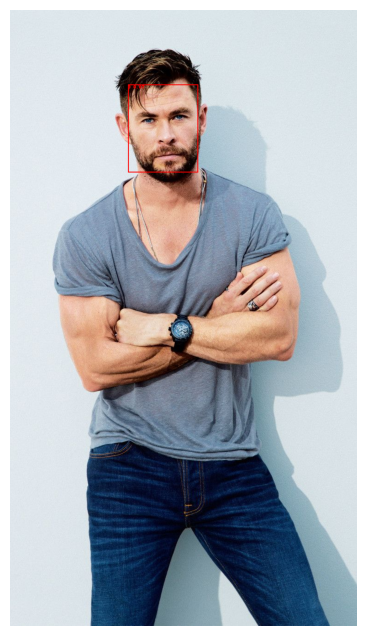

In [40]:
# Draw bounding boxes
result_image = draw_bounding_boxes(image, results)

# Display image
display_image(result_image)

In [43]:
CroppedImage=crop_bounding_box(image, results)

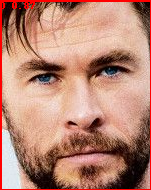

In [44]:
CroppedImage

In [46]:
# Paths
model_path = '/content/drive/MyDrive/GP_YOLOV8Model/runs/detect/train2/weights/best.pt'
image_path = '/content/drive/MyDrive/GP_YOLOV5Model/ezznow.jpg'  # replace with the path to your image



In [47]:
# Load model
model = load_model(model_path)

In [48]:
# Preprocess image
image = preprocess_image(image_path)

In [49]:
# Predict
resultsR = predict(model, CroppedImage)


0: 640x512 1 thor (Chris Hemsworth), 40.1ms
Speed: 2.5ms preprocess, 40.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 512)


In [51]:
class_id_thor = 5

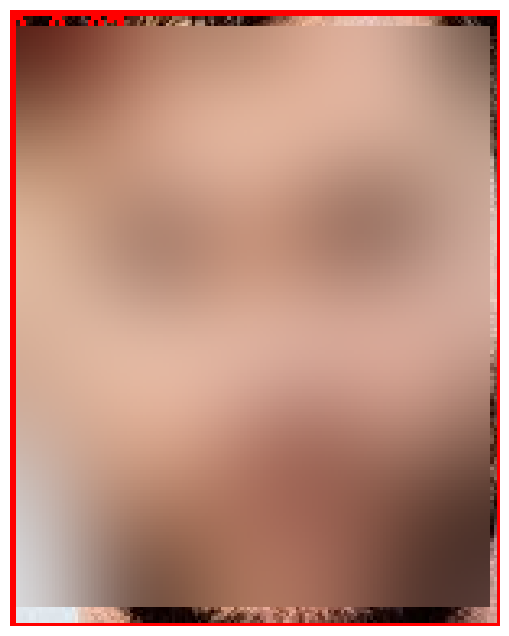

In [52]:
from PIL import Image, ImageDraw, ImageFilter
# Blur faces recognized as Thor
result_image = blur_faces(CroppedImage, resultsR, class_id_thor)

# Display image
display_image(result_image)

In [53]:
# Blur faces in the original image
result_image = blur_faces(image.copy(), results)

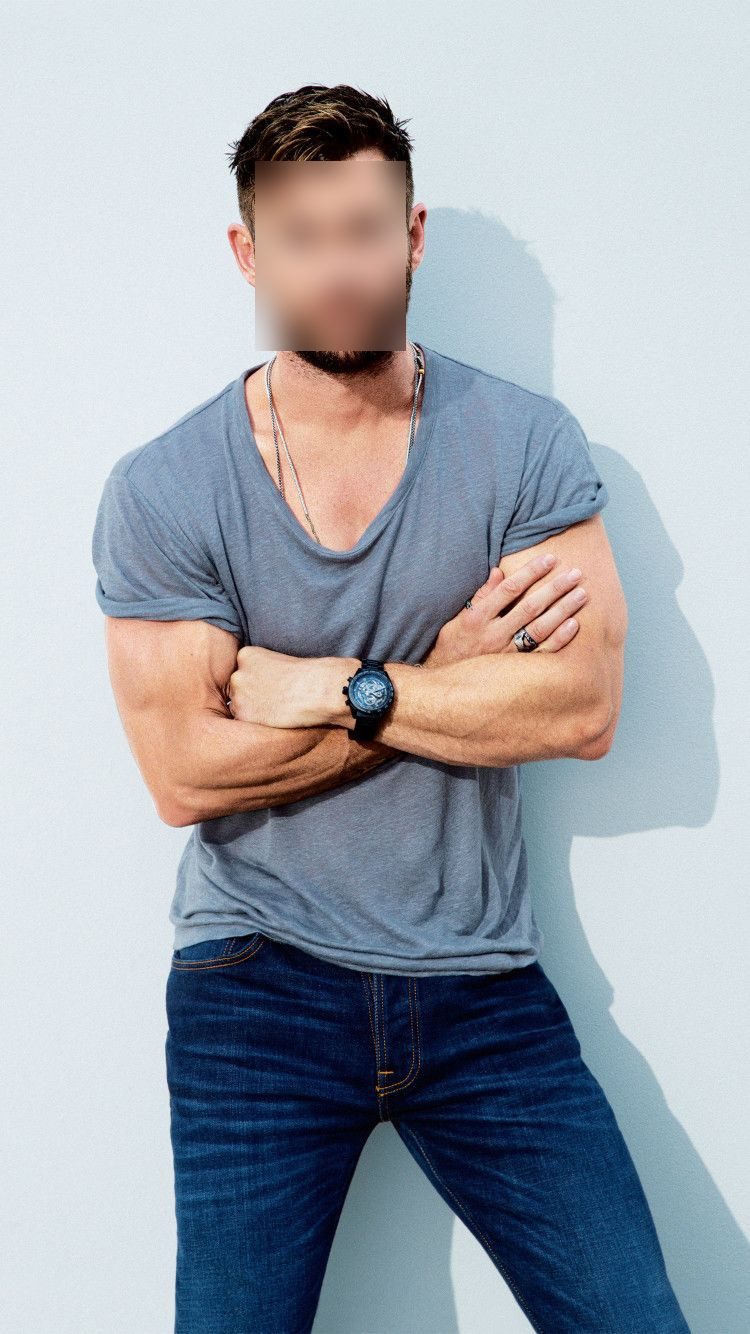

In [54]:
result_image

In [55]:
def save_image(image, save_path):
    image.save(save_path, format='JPEG')
    print(f"Image saved at {save_path}")


save_path = '/content/drive/MyDrive/GP_YOLOV8Model/CrisHemsWorthBlurred.jpeg'
save_image(result_image, save_path)

Image saved at /content/drive/MyDrive/GP_YOLOV8Model/CrisHemsWorthBlurred.jpeg


In [60]:
# Paths
model_path = '/content/drive/MyDrive/GP_YOLOV8Model/runs/detect/train2/weights/best.pt'
image_path = '/content/drive/MyDrive/GP_YOLOV8Model/CrisHemsWorthBlurred.jpeg'  # replace with the path to your image


In [61]:
# Load model
model = load_model(model_path)

In [62]:
# Preprocess image
image = preprocess_image(image_path)

In [63]:
# Predict
results = predict(model, image)


0: 640x384 (no detections), 15.1ms
Speed: 2.9ms preprocess, 15.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 384)


In [105]:
# Paths
model_path = '/content/drive/MyDrive/GP_YOLOV8Model/runs/detect/train/weights/best.pt'
image_path = '/content/drive/MyDrive/GP_YOLOV8Model/all.jpg'  # replace with the path to your image



In [106]:
# Load model
model = load_model(model_path)

In [107]:
# Preprocess image
image = preprocess_image(image_path)

In [108]:
# Predict
results = predict(model, image)


0: 352x640 4 faces, 6.8ms
Speed: 1.9ms preprocess, 6.8ms inference, 1.4ms postprocess per image at shape (1, 3, 352, 640)


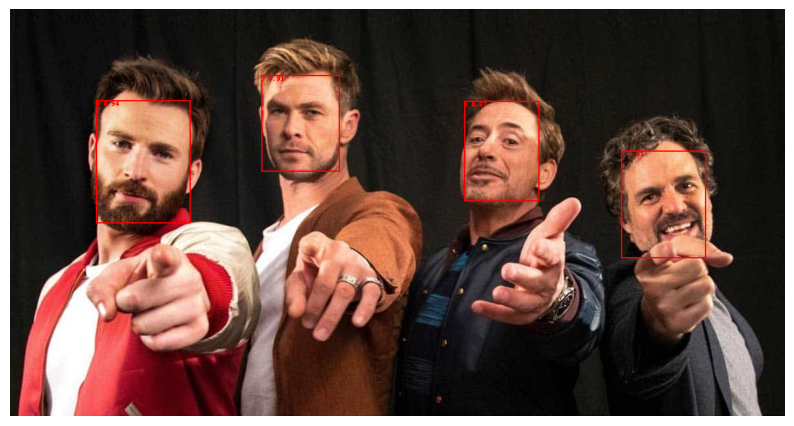

In [86]:
# Draw bounding boxes
result_image = draw_bounding_boxes(image, results)

# Display image
display_image(result_image)

In [109]:
CroppedImageMultiple=crop_bounding_boxes2(image, results)

In [110]:
CroppedImageMultiple

[<PIL.Image.Image image mode=RGB size=146x190>,
 <PIL.Image.Image image mode=RGB size=121x149>,
 <PIL.Image.Image image mode=RGB size=116x155>,
 <PIL.Image.Image image mode=RGB size=131x166>]

In [90]:
import numpy as np

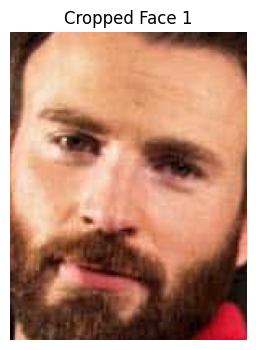

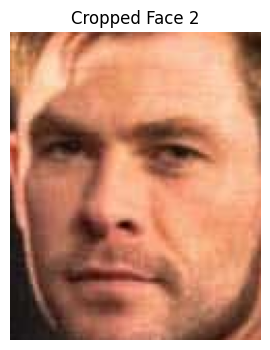

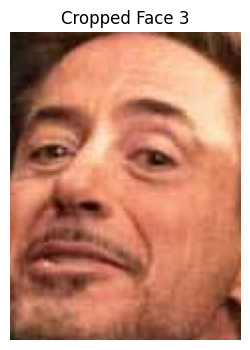

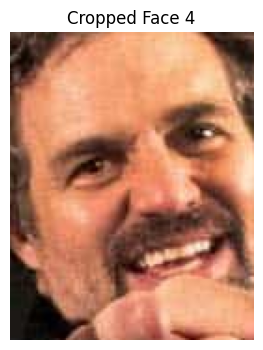

In [111]:
# Display the cropped images
display_cropped_images(CroppedImageMultiple)

In [112]:
# Paths
model_path = '/content/drive/MyDrive/GP_YOLOV8Model/runs/detect/train2/weights/best.pt'
image_path = '/content/drive/MyDrive/GP_YOLOV8Model/all.jpg'  # replace with the path to your image



In [94]:
# Preprocess image
image = preprocess_image(image_path)

In [113]:
# Load model
model = load_model(model_path)

In [114]:
# Predict
resultsR = predict(model, CroppedImageMultiple)


0: 640x640 1 steve_rogers (Chris Evans), 5.5ms
1: 640x640 1 thor (Chris Hemsworth), 5.5ms
2: 640x640 1 tony_stark (Robert Downey Jr.), 5.5ms
3: 640x640 1 bruce_banner (Mark Ruffalo), 5.5ms
Speed: 2.7ms preprocess, 5.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


In [115]:
def blur_faces(images, results_list, class_id_to_blur=None):
    blurred_images = []
    for image, results in zip(images, results_list):
        for result in results:
            for box in result.boxes:
                if class_id_to_blur is None or int(box.cls[0].item()) == class_id_to_blur:
                    xyxy = box.xyxy[0].tolist()
                    xmin, ymin, xmax, ymax = map(int, xyxy)
                    face = image.crop((xmin, ymin, xmax, ymax))
                    blurred_face = face.filter(ImageFilter.GaussianBlur(15))
                    image.paste(blurred_face, (xmin, ymin))
        blurred_images.append(image)
    return blurred_images

# Replace blurred faces into the original image
def replace_blurred_faces(original_image, results, blurred_images):
    for result, blurred_face in zip(results[0].boxes.xyxy.tolist(), blurred_images):
        xmin, ymin, xmax, ymax = map(int, result[:4])
        blurred_face = blurred_face.resize((xmax - xmin, ymax - ymin))
        original_image.paste(blurred_face, (xmin, ymin))
    return original_image


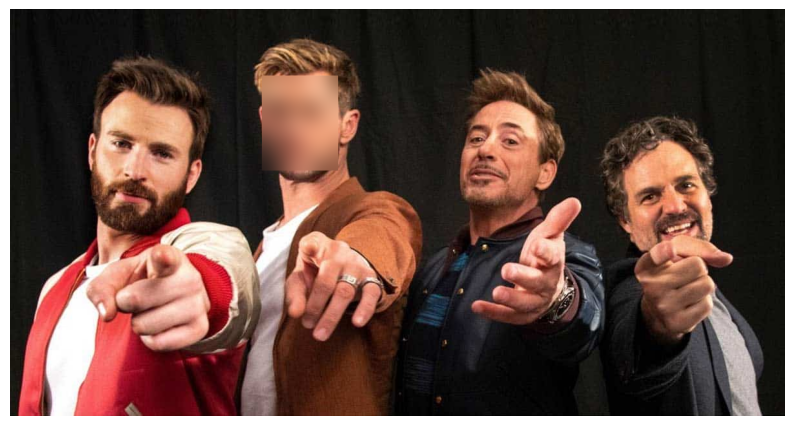

In [116]:
# Blur faces
blurred_images = blur_faces(CroppedImageMultiple, resultsR, class_id_thor)

# Replace blurred faces in the original image
final_image = replace_blurred_faces(image.copy(), results, blurred_images)

# Display the final image without bounding boxes
display_image(final_image)